# Import pustaka

In [229]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import re
from datetime import datetime

pd.set_option('display.max_columns', None)  

# Load data

In [230]:
preproc_train = pd.read_csv("../input/train_data.csv")
test = pd.read_csv("../input/test_data.csv")
preproc_train.head()

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,word-11,word-12,word-13,word-14,word-15,word-16,word-17,word-18,word-19,word-20,word-21,word-22,word-23,word-24,word-25,word-26,word-27,word-28,word-29,word-30,word-31,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,1,5,0.0,0.0,0.0,0,0.0,0.0,1,0,1,1,0.0,0,1,0.0,0.0,0,0,1,0.0,0.0,0,0.0,0,0.0,0.0,0,0,1.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0
1,2,117,1.0,4.0,3.0,NaN,5.0,2.0,9,19,6,1,2.0,3,9,15.0,4.0,10,9,79,1.0,0.0,19,17.0,5,25.0,0.0,8,2,NaN,2,1.0,3.0,13,9.0,15,3.0,NaN,13,3,1,0
2,3,30,1.0,1.0,5.0,8,3.0,2.0,2,2,1,1,1.0,0,1,7.0,1.0,1,1,17,1.0,1.0,7,1.0,0,11.0,2.0,1,1,2.0,0,0.0,1.0,5,1.0,1,1.0,0.0,0,0,0,0
3,4,3,0.0,0.0,0.0,0,0.0,0.0,0,1,0,0,0.0,0,1,1.0,0.0,0,0,1,0.0,0.0,0,0.0,0,0.0,0.0,1,0,0.0,0,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0,0,0
4,5,263,6.0,8.0,8.0,NaN,26.0,1.0,21,35,10,5,9.0,4,14,42.0,13.0,15,6,NaN,20.0,4.0,86,19.0,25,18.0,5.0,14,24,56.0,20,6.0,10.0,NaN,5.0,49,26.0,24.0,23,4,24,1


# Cek jumlah data

In [231]:
print("train length: ",len(preproc_train))
print("test length: ",len(test))

train length:  3620
test length:  1552


# Cek perbandingan kelas 

0    2574
1    1046
Name: Result, dtype: int64

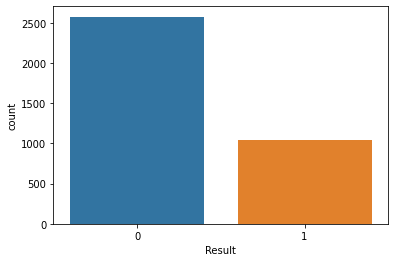

In [232]:

sns.countplot(x='Result', data=preproc_train)
preproc_train.Result.value_counts()


# Cek variabilitas data

In [233]:
preproc_train.describe()

,id,word-2,word-3,word-4,word-6,word-7,word-12,word-15,word-16,word-20,word-21,word-23,word-25,word-26,word-29,word-31,word-32,word-34,word-36,word-37,Result
count,3620.000000,3604.000000,3606.000000,3597.000000,3597.000000,3600.000000,3600.000000,3596.000000,3609.000000,3606.000000,3609.000000,3605.000000,3603.000000,3607.000000,3604.000000,3609.000000,3610.000000,3609.000000,3607.000000,3606.000000,3620.000000
mean,1810.500000,1.752775,1.298392,1.926606,3.046150,1.410000,1.290278,9.063404,1.435578,1.513034,1.259352,5.324827,5.262559,1.068755,10.971976,1.319202,1.772853,1.372125,37.739950,3.247920,0.288950
std,1045.148315,3.751389,2.766599,4.131414,6.061796,2.590879,2.742220,14.611916,2.667310,4.364428,2.492630,9.020088,8.098156,3.071660,18.276807,3.386842,3.400314,2.794576,2163.622051,6.087762,0.453337
min,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,905.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1810.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2715.250000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,10.000000,2.000000,2.000000,2.000000,6.000000,6.000000,1.000000,12.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000
max,3620.000000,81.000000,66.000000,117.000000,89.000000,31.000000,56.000000,275.000000,39.000000,123.000000,43.000000,111.000000,108.000000,39.000000,302.000000,57.000000,66.000000,33.000000,129945.000000,108.000000,1.000000


# Cek apakah ada data dengan id duplikat

In [234]:
dup = preproc_train["id"].duplicated() 
dup.value_counts()

False    3620
Name: id, dtype: int64

# Data id tidak ada duplikat, kolom id bisa di drop

In [235]:
preproc_train.drop('id', axis=1, inplace=True)
preproc_train.head()

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,word-11,word-12,word-13,word-14,word-15,word-16,word-17,word-18,word-19,word-20,word-21,word-22,word-23,word-24,word-25,word-26,word-27,word-28,word-29,word-30,word-31,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,5,0.0,0.0,0.0,0,0.0,0.0,1,0,1,1,0.0,0,1,0.0,0.0,0,0,1,0.0,0.0,0,0.0,0,0.0,0.0,0,0,1.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0
1,117,1.0,4.0,3.0,NaN,5.0,2.0,9,19,6,1,2.0,3,9,15.0,4.0,10,9,79,1.0,0.0,19,17.0,5,25.0,0.0,8,2,NaN,2,1.0,3.0,13,9.0,15,3.0,NaN,13,3,1,0
2,30,1.0,1.0,5.0,8,3.0,2.0,2,2,1,1,1.0,0,1,7.0,1.0,1,1,17,1.0,1.0,7,1.0,0,11.0,2.0,1,1,2.0,0,0.0,1.0,5,1.0,1,1.0,0.0,0,0,0,0
3,3,0.0,0.0,0.0,0,0.0,0.0,0,1,0,0,0.0,0,1,1.0,0.0,0,0,1,0.0,0.0,0,0.0,0,0.0,0.0,1,0,0.0,0,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0,0,0
4,263,6.0,8.0,8.0,NaN,26.0,1.0,21,35,10,5,9.0,4,14,42.0,13.0,15,6,NaN,20.0,4.0,86,19.0,25,18.0,5.0,14,24,56.0,20,6.0,10.0,NaN,5.0,49,26.0,24.0,23,4,24,1


# Ubah seluruh kolom ke bentuk float, catat mean untuk setiap kolom

In [236]:
preproc_train.apply(pd.to_numeric, errors='ignore', downcast='float')
float_train = preproc_train.copy()

In [237]:
mean_list = []
for column in float_train:
    if(column != 'Result'):
        sum = 0
        count = 0
        for i in range(len(float_train[column])):
                try:
                    temp = float(float_train[column][i])
                    if(not np.isnan(temp)):
                        sum = sum + temp
                        count = count + 1
                except:
                    pass        
        #print(sum, count, sum/count)
        mean_list.append(sum/count)


In [238]:
i = 0
mean_dict = {}
for column in preproc_train:
    if(column != 'Result'):
        dict = {column:  str(mean_list[i])}
        mean_dict.update(dict) 
        i = i + 1

mean_dict

{'word-1': '218.46064301552107',
 'word-2': '1.7527746947835738',
 'word-3': '1.2983915696062118',
 'word-4': '1.926605504587156',
 'word-5': '9.576398552741441',
 'word-6': '3.046149569085349',
 'word-7': '1.41',
 'word-8': '4.760011123470523',
 'word-9': '6.859375',
 'word-10': '3.2464573492636846',
 'word-11': '2.1949458483754514',
 'word-12': '1.2902777777777779',
 'word-13': '1.3514190317195325',
 'word-14': '3.083471991125901',
 'word-15': '9.063403781979977',
 'word-16': '1.4355777223607649',
 'word-17': '2.9963868816008894',
 'word-18': '1.4855475264035576',
 'word-19': '473.7041072925398',
 'word-20': '1.5130338325013866',
 'word-21': '1.259351620947631',
 'word-22': '8717.867516629713',
 'word-23': '5.324826629680999',
 'word-24': '4.5337950138504155',
 'word-25': '5.26255897862892',
 'word-26': '1.0687551982256722',
 'word-27': '2.9603658536585367',
 'word-28': '2.6310975609756095',
 'word-29': '10.971975582685905',
 'word-30': '1.5544142143253747',
 'word-31': '1.3192019950

# Lihat data yang mengandung symbol 

In [239]:
out_char = []
preproc_train = float_train.copy()
preproc_train = preproc_train.astype('str')
for column in preproc_train:
    if(column != 'Result'):
        preproc_train[column] = preproc_train[column].apply(lambda row: re.sub("[0-9]", "", row))
        out_char = out_char + preproc_train[column].unique().tolist()

out_set = set(out_char)
print(out_set)


{'', '\\', 'a', '+F', '-.', 'nan', '.', 'h', '`', '['}


<b> '' -> data kosong hasil sub regex angka integer, <br>
'+F', -> simbol tidak berarti, <br>
'h',  -> simbol tidak berarti, <br>
'\\',  -> simbol tidak berarti, <br>
'[', -> simbol tidak berarti, <br>
'-.', -> simbol bilangan negatif, <br>
'.', -> simbol tanda desimal, <br>
'a',  -> simbol tidak berarti, <br>
'`', -> simbol tidak berarti, <br>
'nan' -> simbol NaN, </b>

# Bersihkan data yang mengandung symbol dan NaN

In [240]:
preproc_train = float_train.copy()
preproc_train = preproc_train.astype('str')

for column in preproc_train:
    if(column != 'Result'):
        preproc_train[column] = preproc_train[column].apply(lambda row: str(mean_dict[column]) if row == "4+F2185" else row)
        preproc_train[column] = preproc_train[column].apply(lambda row: re.sub("^()$", str(mean_dict[column]), row))
        preproc_train[column] = preproc_train[column].apply(lambda row: re.sub("[h]", str(mean_dict[column]), row))
        preproc_train[column] = preproc_train[column].apply(lambda row: re.sub("[\\\\]", str(mean_dict[column]), row))
        preproc_train[column] = preproc_train[column].apply(lambda row: re.sub("[[]", str(mean_dict[column]), row))
        preproc_train[column] = preproc_train[column].apply(lambda row: re.sub("[`]", "", row))
        preproc_train[column] = preproc_train[column].apply(lambda row: re.sub("^[a]$", str(mean_dict[column]), row))
        preproc_train[column] = preproc_train[column].apply(lambda row: re.sub("^(nan)$", str(mean_dict[column]), row))


# Ubah data ke bentuk float

In [241]:
for column in preproc_train:
    if(column != 'Result'):
        for i in range(len(preproc_train[column])):
            try:
                float(preproc_train[column][i])
            except:
                print(column, i, preproc_train[column][i])

word-9 571 


In [242]:
#preproc_train.apply(pd.to_numeric, errors='coerce', downcast='float')
float_train = preproc_train.copy()
float_train['word-9'][571] = mean_dict['word-9']

In [243]:
float_train = float_train.astype(float)
float_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3620 entries, 0 to 3619
Data columns (total 41 columns):
word-1     3620 non-null float64
word-2     3620 non-null float64
word-3     3620 non-null float64
word-4     3620 non-null float64
word-5     3620 non-null float64
word-6     3620 non-null float64
word-7     3620 non-null float64
word-8     3620 non-null float64
word-9     3620 non-null float64
word-10    3620 non-null float64
word-11    3620 non-null float64
word-12    3620 non-null float64
word-13    3620 non-null float64
word-14    3620 non-null float64
word-15    3620 non-null float64
word-16    3620 non-null float64
word-17    3620 non-null float64
word-18    3620 non-null float64
word-19    3620 non-null float64
word-20    3620 non-null float64
word-21    3620 non-null float64
word-22    3620 non-null float64
word-23    3620 non-null float64
word-24    3620 non-null float64
word-25    3620 non-null float64
word-26    3620 non-null float64
word-27    3620 non-null float64
wo

In [244]:
float_train.head()

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,word-11,word-12,word-13,word-14,word-15,word-16,word-17,word-18,word-19,word-20,word-21,word-22,word-23,word-24,word-25,word-26,word-27,word-28,word-29,word-30,word-31,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,5.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0
1,117.0,1.0,4.0,3.0,9.576399,5.0,2.0,9.0,19.0,6.0,1.0,2.0,3.0,9.0,15.0,4.0,10.0,9.0,79.000000,1.0,0.0,19.0,17.0,5.0,25.0,0.0,8.0,2.0,10.971976,2.0,1.0,3.0,13.000000,9.0,15.0,3.0,3.24792,13.00000,3.0,1.0,0.0
2,30.0,1.0,1.0,5.0,8.000000,3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,7.0,1.0,1.0,1.0,17.000000,1.0,1.0,7.0,1.0,0.0,11.0,2.0,1.0,1.0,2.000000,0.0,0.0,1.0,5.000000,1.0,1.0,1.0,0.00000,0.00000,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,6.541817,0.0,0.0,0.0,0.00000,116.54616,0.0,0.0,0.0
4,263.0,6.0,8.0,8.0,9.576399,26.0,1.0,21.0,35.0,10.0,5.0,9.0,4.0,14.0,42.0,13.0,15.0,6.0,473.704107,20.0,4.0,86.0,19.0,25.0,18.0,5.0,14.0,24.0,56.000000,20.0,6.0,10.0,6.541817,5.0,49.0,26.0,24.00000,23.00000,4.0,24.0,1.0


In [245]:
float_train.describe()

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,word-11,word-12,word-13,word-14,word-15,word-16,word-17,word-18,word-19,word-20,word-21,word-22,word-23,word-24,word-25,word-26,word-27,word-28,word-29,word-30,word-31,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
count,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.00000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3.620000e+03,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.00000,3620.000000
mean,218.460643,1.752775,1.298392,1.926606,9.606785,3.046150,1.41000,4.763116,6.865491,3.248323,2.194946,1.290278,1.358504,3.083449,9.063404,1.435578,2.996664,1.485548,473.296116,1.513034,1.259352,8.713060e+03,5.324827,4.533095,5.262559,1.068755,2.960101,2.631098,10.971976,1.554414,1.319202,1.772853,6.545938,1.372125,6.209669,37.739950,3.247920,116.516728,1.991699,2.47885,0.288950
std,9775.426834,3.743087,2.761243,4.118265,16.428094,6.042503,2.58371,7.444187,13.014915,5.071307,3.760998,2.734632,2.899668,4.563145,14.563384,2.663253,5.473541,2.995380,18782.227293,4.355978,2.488839,5.221457e+05,9.001376,8.592310,8.079113,3.066138,4.174233,6.290736,18.236360,3.235520,3.381691,3.395613,11.573983,2.790326,9.628248,2159.732525,6.075976,6853.184123,3.625146,4.47475,0.453337
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,28.000000,1.000000,0.000000,1.000000,5.000000,1.000000,1.00000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,5.000000e+00,2.000000,2.000000,3.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
75%,63.000000,2.000000,1.298392,2.000000,11.000000,3.000000,2.00000,6.000000,7.000000,4.000000,3.000000,1.290278,2.000000,4.000000,10.000000,2.000000,3.000000,2.000000,52.000000,2.000000,2.000000,1.200000e+01,6.000000,5.000000,6.000000,1.000000,4.000000,2.631098,12.000000,2.000000,1.000000,2.000000,8.000000,2.000000,7.000000,2.000000,3.061980,3.000000,2.000000,3.00000,1.000000
max,588184.000000,81.000000,66.000000,117.000000,305.000000,89.000000,31.00000,135.000000,267.000000,67.000000,66.000000,56.000000,47.000000,45.000000,275.000000,39.000000,83.000000,43.000000,994821.000000,123.000000,43.000000,3.141567e+07,111.000000,131.000000,108.000000,39.000000,62.000000,77.000000,302.000000,37.000000,57.000000,66.000000,210.000000,33.000000,132.000000,129945.000000,108.000000,412334.000000,63.000000,70.00000,1.000000


# Cek persebaran null value pada data

jumlah NaN pada data:  0


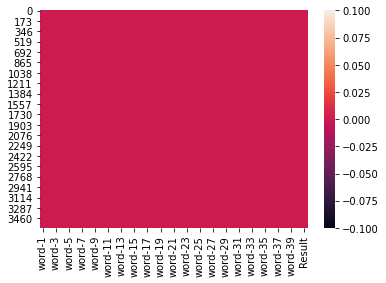

In [246]:
missing_values = float_train.isnull()
sns.heatmap(data = missing_values)
print("jumlah NaN pada data: ",float_train.isnull().sum().sum())

# Handle Missing Value Data Testing

In [247]:
preproc_test = test.copy()
preproc_test.drop('id', axis=1, inplace=True)
preproc_test = preproc_test.astype('str')

for column in preproc_test:
    if(column != 'Result'):
        preproc_test[column] = preproc_test[column].apply(lambda row: re.sub("^(nan)$", str(mean_dict[column]), row))


In [248]:
float_test = preproc_test.copy()
float_test = float_test.astype(float)
float_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 40 columns):
word-1     1552 non-null float64
word-2     1552 non-null float64
word-3     1552 non-null float64
word-4     1552 non-null float64
word-5     1552 non-null float64
word-6     1552 non-null float64
word-7     1552 non-null float64
word-8     1552 non-null float64
word-9     1552 non-null float64
word-10    1552 non-null float64
word-11    1552 non-null float64
word-12    1552 non-null float64
word-13    1552 non-null float64
word-14    1552 non-null float64
word-15    1552 non-null float64
word-16    1552 non-null float64
word-17    1552 non-null float64
word-18    1552 non-null float64
word-19    1552 non-null float64
word-20    1552 non-null float64
word-21    1552 non-null float64
word-22    1552 non-null float64
word-23    1552 non-null float64
word-24    1552 non-null float64
word-25    1552 non-null float64
word-26    1552 non-null float64
word-27    1552 non-null float64
wo

# Cek Unusual Value

In [249]:
float_train.describe()

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,word-11,word-12,word-13,word-14,word-15,word-16,word-17,word-18,word-19,word-20,word-21,word-22,word-23,word-24,word-25,word-26,word-27,word-28,word-29,word-30,word-31,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
count,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.00000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3.620000e+03,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.00000,3620.000000
mean,218.460643,1.752775,1.298392,1.926606,9.606785,3.046150,1.41000,4.763116,6.865491,3.248323,2.194946,1.290278,1.358504,3.083449,9.063404,1.435578,2.996664,1.485548,473.296116,1.513034,1.259352,8.713060e+03,5.324827,4.533095,5.262559,1.068755,2.960101,2.631098,10.971976,1.554414,1.319202,1.772853,6.545938,1.372125,6.209669,37.739950,3.247920,116.516728,1.991699,2.47885,0.288950
std,9775.426834,3.743087,2.761243,4.118265,16.428094,6.042503,2.58371,7.444187,13.014915,5.071307,3.760998,2.734632,2.899668,4.563145,14.563384,2.663253,5.473541,2.995380,18782.227293,4.355978,2.488839,5.221457e+05,9.001376,8.592310,8.079113,3.066138,4.174233,6.290736,18.236360,3.235520,3.381691,3.395613,11.573983,2.790326,9.628248,2159.732525,6.075976,6853.184123,3.625146,4.47475,0.453337
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,28.000000,1.000000,0.000000,1.000000,5.000000,1.000000,1.00000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,5.000000e+00,2.000000,2.000000,3.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
75%,63.000000,2.000000,1.298392,2.000000,11.000000,3.000000,2.00000,6.000000,7.000000,4.000000,3.000000,1.290278,2.000000,4.000000,10.000000,2.000000,3.000000,2.000000,52.000000,2.000000,2.000000,1.200000e+01,6.000000,5.000000,6.000000,1.000000,4.000000,2.631098,12.000000,2.000000,1.000000,2.000000,8.000000,2.000000,7.000000,2.000000,3.061980,3.000000,2.000000,3.00000,1.000000
max,588184.000000,81.000000,66.000000,117.000000,305.000000,89.000000,31.00000,135.000000,267.000000,67.000000,66.000000,56.000000,47.000000,45.000000,275.000000,39.000000,83.000000,43.000000,994821.000000,123.000000,43.000000,3.141567e+07,111.000000,131.000000,108.000000,39.000000,62.000000,77.000000,302.000000,37.000000,57.000000,66.000000,210.000000,33.000000,132.000000,129945.000000,108.000000,412334.000000,63.000000,70.00000,1.000000


In [250]:
float_train['word-1'].value_counts().sort_index()

0.0          39
1.0          26
2.0         118
3.0         160
4.0          64
           ... 
911.0         1
951.0         1
1450.0        1
1898.0        1
588184.0      1
Name: word-1, Length: 329, dtype: int64

In [251]:
float_train[float_train['word-1'] == 588184.0 ]

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,word-11,word-12,word-13,word-14,word-15,word-16,word-17,word-18,word-19,word-20,word-21,word-22,word-23,word-24,word-25,word-26,word-27,word-28,word-29,word-30,word-31,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
3609,588184.0,0.0,2.0,3.0,15.0,5.0,4.0,12.0,5.0,3.0,3.0,4.0,6.0,3.0,19.0,3.0,3.0,3.0,44.0,5.0,4.0,2.0,6.0,4.0,8.0,0.0,6.0,1.0,14.0,0.0,1.0,3.0,7.0,3.0,6.0,3.0,0.0,0.0,5.0,7.0,0.0


# Split Data Training:Validasi -> 80:20

In [252]:
data_training = float_train[0:int(3620*0.8)].copy()
data_validation = float_train[int(3620*0.8):int(3620*0.8)+int(3620*0.2)].copy()
data_cv = float_train.copy()

In [253]:
cols = float_train.columns.tolist()

x_train = data_training[cols[0:40]]
y_train = data_training[cols[40]]

x_val = data_validation[cols[0:40]]
y_val = data_validation[cols[40]]

x_cv = data_cv[cols[0:40]]
y_cv = data_cv[cols[40]]



In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_cv)
scaled_x_cv = scaler.transform(x_cv)
scaled_x_test = scaler.transform(float_test)
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

In [255]:
scaled_x_test = scaler.transform(float_test)

## SMOTE

In [256]:
label = y_cv.copy()

In [257]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
features, label = sm.fit_sample(scaled_x_cv , label.ravel())

In [258]:
import collections
collections.Counter(label)

Counter({0.0: 2574, 1.0: 2574})

# Variance

In [259]:
x = np.var(scaled_x_val, axis=0)
for i in range(len(x)):
    print(x[i])

4.994142770992758
1.5636096567566935
0.9044152982108559
2.19635194191902
1.3746580450189019
1.0759530896542986
0.9162712534101309
1.1392439917094543
1.6290487954326092
1.1090464225555319
1.1782717103010873
1.8814781132973364
1.4937334916173501
1.074604588963217
1.5460148328581786
1.443762647845895
1.2958994407234858
1.2461197000484288
2.6314581317069737e-05
2.8317196462114205
1.2353707849695872
3.850833721207318e-07
1.3758392715486092
1.4878533052388163
1.2354578090005168
1.1171384902553754
1.0750223743314384
1.1750103184932383
1.4193693987994198
1.0462097409761593
1.681919371762308
1.4128120426981905
1.281793195719541
1.186803165834364
1.2228579383201756
4.994468771702662
1.296630899032544
8.959410795050881e-07
1.070178336013083
1.2886472212421012


# Build model Sklearn

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from xgboost.sklearn import XGBClassifier


from sklearn.model_selection import cross_val_score

## Random Forest

In [261]:
rfmodel = RandomForestClassifier(n_estimators=2000, criterion='gini', n_jobs=-1)
start=datetime.now()  
score =  cross_val_score(rfmodel, x_cv, y_cv, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

0:00:35.091143
score:  0.8828729281767955


In [262]:
start=datetime.now()  
score =  cross_val_score(rfmodel, scaled_x_cv, y_cv, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

0:00:34.070503
score:  0.8837016574585637


In [263]:
start=datetime.now()  
score =  cross_val_score(rfmodel, features, label, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

0:00:49.453585
score:  0.9271671053997188


## AdaBoost

In [264]:
adaboostmodel = AdaBoostClassifier(n_estimators=5500, random_state=101, learning_rate = 0.1)
start=datetime.now()  
score =  cross_val_score(adaboostmodel, x_cv, y_cv, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

start=datetime.now()  
score =  cross_val_score(adaboostmodel, scaled_x_cv, y_cv, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

0:03:18.312678
score:  0.8712707182320442
0:03:20.064885
score:  0.8709944751381216


In [265]:
start=datetime.now()  
score =  cross_val_score(adaboostmodel, features, label, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

0:05:38.682772
score:  0.9036674309113384


## Gradient Boosting

In [ ]:
gbmodel = GradientBoostingClassifier(
    loss = 'exponential',
    n_estimators=3000, 
    random_state=101, #261
    max_features = 2,
    max_depth = 8
)
start=datetime.now()  
score =  cross_val_score(gbmodel, x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:
start=datetime.now()  
score =  cross_val_score(gbmodel, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:
start=datetime.now()  
score =  cross_val_score(gbmodel, features, label, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

## SVM

In [ ]:
svm = SVC(
        kernel="rbf",
        gamma = 0.0001,
        C = 1000
    )

start=datetime.now()  
score =  cross_val_score(svm, x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:
svm = SVC(
    kernel="rbf",
    gamma = 0.101,
    C = 10
)
        
start=datetime.now()  
score =  cross_val_score(svm, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:
start=datetime.now()  
score =  cross_val_score(svm, features, label, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

## Logistic Regression

In [ ]:
logmodel = LogisticRegression(max_iter = 100000)

start=datetime.now()  
score =  cross_val_score(logmodel, x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:
start=datetime.now()  
score =  cross_val_score(logmodel, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:
start=datetime.now()  
score =  cross_val_score(logmodel, features, label, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

## Naive-Bayes (Bernoulli)

In [ ]:
nbmodel = BernoulliNB()

start=datetime.now()  
score =  cross_val_score(nbmodel, x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:
start=datetime.now()  
score =  cross_val_score(nbmodel, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:
start=datetime.now()  
score =  cross_val_score(nbmodel, features, label, cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

## Best Classical Method : GBoost

In [ ]:
gbmodel.fit(features, label)

gbprediction = gbmodel.predict(scaled_x_test)
gbprediction

In [ ]:
data_id = np.arange(3621,5173)
data = {
    'id': data_id,
    'Result': gbprediction
}

df = pd.DataFrame (data, columns = ['id','Result'])
df = df.astype(int)
df.head()


In [ ]:
df.to_csv('early-tori_gb_smote.csv',index=False)

## Voting Classifier (GB XGB)

In [ ]:
from sklearn.ensemble import VotingClassifier 

estimator = [] 
estimator.append(
    ('GB1', 
         GradientBoostingClassifier(
            loss = 'exponential',
            n_estimators=3000, 
            random_state=261,
            max_features = 2,
            max_depth = 8
        )
    )
) 
 


estimator.append(('XGB', XGBClassifier(
    learning_rate =0.07,
    n_estimators=1000,
    seed=1
)))
 

vchmodel = VotingClassifier(estimators = estimator, voting ='hard') 
vcsmodel = VotingClassifier(estimators = estimator, voting ='soft') 

start=datetime.now()  
score =  cross_val_score(vchmodel, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())


start=datetime.now()  
score =  cross_val_score(vcsmodel, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())


In [ ]:
from sklearn.ensemble import VotingClassifier 

estimator = [] 
estimator.append(
    ('GB1', 
         GradientBoostingClassifier(
            loss = 'exponential',
            n_estimators=3000, 
            random_state=261,
            max_features = 2,
            max_depth = 8
        )
    )
) 
 


estimator.append(('XGB', XGBClassifier(
    learning_rate =0.07,
    n_estimators=1000,
    seed=1
)))
 

vchmodel = VotingClassifier(estimators = estimator, voting ='hard') 
vcsmodel = VotingClassifier(estimators = estimator, voting ='soft') 

start=datetime.now()  
score =  cross_val_score(vchmodel, features, label,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())


start=datetime.now()  
score =  cross_val_score(vcsmodel, features, label,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())


# Voting Classifier (SVM GB RF)

In [ ]:
from sklearn.ensemble import VotingClassifier 

estimator = [] 
estimator.append(
    ('SVC', 
         SVC(
            kernel="rbf",
            gamma = 0.101,
            C = 10,
            probability = True
        )
    )
)

estimator.append(
    ('GB', 
         GradientBoostingClassifier(
            loss = 'exponential',
            n_estimators=3000, 
            random_state=261,
            max_features = 2,
            max_depth = 8
        )
    )
) 

estimator.append(
    ('RF', 
         RandomForestClassifier(n_estimators=2000, criterion='gini')
    )
) 





vchmodel = VotingClassifier(estimators = estimator, voting ='hard') 
vcsmodel = VotingClassifier(estimators = estimator, voting ='soft') 

start=datetime.now()  
score =  cross_val_score(vchmodel, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())


start=datetime.now()  
score =  cross_val_score(vcsmodel, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())


In [ ]:
from sklearn.ensemble import VotingClassifier 

estimator = [] 
estimator.append(
    ('SVC', 
         SVC(
            kernel="rbf",
            gamma = 0.101,
            C = 10,
            probability = True
        )
    )
)

estimator.append(
    ('GB', 
         GradientBoostingClassifier(
            loss = 'exponential',
            n_estimators=3000, 
            random_state=261,
            max_features = 2,
            max_depth = 8
        )
    )
) 

estimator.append(
    ('RF', 
         RandomForestClassifier(n_estimators=2000, criterion='gini')
    )
) 





vchmodel = VotingClassifier(estimators = estimator, voting ='hard') 
vcsmodel = VotingClassifier(estimators = estimator, voting ='soft') 

start=datetime.now()  
score =  cross_val_score(vchmodel, features, label,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())


start=datetime.now()  
score =  cross_val_score(vcsmodel,  features, label,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())


In [ ]:
vcsmodel.fit(features, label)

vcsprediction = vcsmodel.predict(scaled_x_test)

data_id = np.arange(3621,5173)
data = {
    'id': data_id,
    'Result': vcsprediction
}

df = pd.DataFrame (data, columns = ['id','Result'])
df = df.astype(int)
df.to_csv('early-tori_ensem_ssmote.csv',index=False)
df.head()


In [ ]:
vchmodel.fit(features, label)

vchprediction = vchmodel.predict(scaled_x_test)

data_id = np.arange(3621,5173)
data = {
    'id': data_id,
    'Result': vchprediction
}

df = pd.DataFrame (data, columns = ['id','Result'])
df = df.astype(int)
df.to_csv('early-tori_ensem_hsmote.csv',index=False)
df.head()


## XGBoost

In [ ]:

xgb_clf = XGBClassifier(
    learning_rate =0.07,
    n_estimators=1000,
    seed=1,
    max_depth = 6
)

start=datetime.now()  
score =  cross_val_score(xgb_clf, scaled_x_cv, y_cv,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

In [ ]:

xgb_clf = XGBClassifier(
    learning_rate =0.07,
    n_estimators=1000,
    seed=1,
    max_depth = 6
)

start=datetime.now()  
score =  cross_val_score(xgb_clf,features, label,cv=5)
print(datetime.now()-start)
print("score: ",score.mean())

# Keras Neural Network Model

In [ ]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution1D, MaxPooling1D, Input, Flatten
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Nadam
from keras.optimizers import Adadelta
from keras.utils import to_categorical

ctg_y_train = to_categorical(y_train)
ctg_y_val = to_categorical(y_val)


## Multi-layered Perceptron

In [ ]:
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(40,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(
    optimizer= Nadam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start=datetime.now()
history = model.fit(
    scaled_x_cv[0:int(3620*0.8)], ctg_y_train,
    epochs=150,
    validation_data=( scaled_x_cv[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val)
)
print(datetime.now()-start)

score = model.evaluate( scaled_x_cv[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(40,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(
    optimizer= Nadam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start=datetime.now()
history = model.fit(
    scaled_x_cv[0:int(3620*0.8)], ctg_y_train,
    epochs=150,
    validation_data=( scaled_x_cv[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val)
)
print(datetime.now()-start)

score = model.evaluate( scaled_x_cv[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

## Convolutional Neural Network

In [ ]:
x_cnn  = scaled_x_cv.reshape(scaled_x_cv.shape[0],40,1)


In [ ]:
x_cnn.shape

In [ ]:
x_cnn[0]

In [ ]:
#def train_model(conv_layer_count, feature_map):
input_layer = Input(
    shape= (40, 1),
    name='input'
)

temp_layer = input_layer
    
for i in range(2):
    convolutional_layer = Convolution1D(
        kernel_size=4, 
        filters=2048,
        activation='relu',
        kernel_initializer='glorot_uniform'
    )(temp_layer)
        
    temp_layer = convolutional_layer
    
max_pool = MaxPooling1D(2)(temp_layer)
    
flatten = Flatten()(max_pool)

dense = Dense(
        2048,
        activation = 'relu'
    )(flatten)

dropout = Dropout(0.5)(dense)
    
dense2 = Dense(
        1024,
        activation = 'relu'
    )(dropout)

dropout2 = Dropout(0.5)(dense2)

dense3 = Dense(
        512,
        activation = 'relu'
    )(dropout2)

dropout3 = Dropout(0.5)(dense3)

output = Dense(2, activation='softmax')(dropout3)

model = Model(inputs=[input_layer], outputs=[output])
    
model.compile(
    optimizer= Nadam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
    
model.summary()

start=datetime.now()
history = model.fit(
    x_cnn[0:int(3620*0.8)], ctg_y_train,
    epochs=150,
    validation_data=( x_cnn[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val)
)
print(datetime.now()-start)

score = model.evaluate(x_cnn[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])


In [ ]:
loss: 0.0078 - accuracy: 0.9965 - val_loss: 3.5941 - val_accuracy: 0.8798

In [ ]:
#def train_model(conv_layer_count, feature_map):
input_layer = Input(
    shape= (40, 1),
    name='input'
)

temp_layer = input_layer
    
for i in range(2):
    convolutional_layer = Convolution1D(
        kernel_size=8, 
        filters=2048,
        activation='relu',
        kernel_initializer='glorot_uniform'
    )(temp_layer)
        
    temp_layer = convolutional_layer
    
max_pool = MaxPooling1D(2)(temp_layer)
    
flatten = Flatten()(max_pool)

dense = Dense(
        2048,
        activation = 'relu'
    )(flatten)

dropout = Dropout(0.5)(dense)
    
dense2 = Dense(
        1024,
        activation = 'relu'
    )(dropout)

dropout2 = Dropout(0.5)(dense2)

dense3 = Dense(
        512,
        activation = 'relu'
    )(dropout2)

dropout3 = Dropout(0.5)(dense3)

output = Dense(2, activation='softmax')(dropout3)

model = Model(inputs=[input_layer], outputs=[output])
    
model.compile(
    optimizer= Nadam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
    
model.summary()

start=datetime.now()
history = model.fit(
    x_cnn[0:int(3620*0.8)], ctg_y_train,
    epochs=150,
    validation_data=( x_cnn[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val)
)
print(datetime.now()-start)

score = model.evaluate(x_cnn[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])


In [ ]:
#def train_model(conv_layer_count, feature_map):
input_layer = Input(
    shape= (40, 1),
    name='input'
)

temp_layer = input_layer
    
for i in range(2):
    convolutional_layer = Convolution1D(
        kernel_size=12, 
        filters=2048,
        activation='relu',
        kernel_initializer='glorot_uniform'
    )(temp_layer)
        
    temp_layer = convolutional_layer
    
max_pool = MaxPooling1D(2)(temp_layer)
    
flatten = Flatten()(max_pool)

dense = Dense(
        2048,
        activation = 'relu'
    )(flatten)

dropout = Dropout(0.5)(dense)
    
dense2 = Dense(
        1024,
        activation = 'relu'
    )(dropout)

dropout2 = Dropout(0.5)(dense2)

dense3 = Dense(
        512,
        activation = 'relu'
    )(dropout2)

dropout3 = Dropout(0.5)(dense3)

output = Dense(2, activation='softmax')(dropout3)

model = Model(inputs=[input_layer], outputs=[output])
    
model.compile(
    optimizer= Nadam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
    
model.summary()

start=datetime.now()
history = model.fit(
    x_cnn[0:int(3620*0.8)], ctg_y_train,
    epochs=150,
    validation_data=( x_cnn[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val)
)
print(datetime.now()-start)

score = model.evaluate(x_cnn[int(3620*0.8):int(3620*0.8)+int(3620*0.2)], ctg_y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])


In [ ]:
scaled_x_test  = scaled_x_test.reshape(scaled_x_test.shape[0],40,1)
predict_mlp = model.predict(scaled_x_test)
pmlp = np.argmax(predict_mlp, axis=1)

In [ ]:
data_id = np.arange(3621,5173)
data = {
    'id': data_id,
    'Result': pmlp
}

df = pd.DataFrame (data, columns = ['id','Result'])
df = df.astype(int)
df.head()
df.to_csv('pred_mlp.csv',index=False)

In [ ]:
df.head()